In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
from numba import njit

In [3]:
import numba

levenberg optimization

In [4]:
%load_ext autoreload
%autoreload 2


In [5]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [6]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [7]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [8]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')


In [9]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

In [10]:

    new_param_vals = get_param_vals('MIN')
    run_id='tmp'
    pro99_mode = False
    t_eval = np.rint(refdf['t'].drop_duplicates().sort_values()).to_numpy()
    t_end = get_t_end(maxday=140, t_eval=t_eval, seconds_in_day=seconds_in_day)

    which_organism = 'ponly'
    if which_organism == 'ponly':
        var_names, init_var_vals, intermediate_names =  get_ponly_init_vars(pro99_mode=pro99_mode)
        calc_dydt = basic_model_ponly_ode
        prepare_params_tuple = prepare_params_tuple_ponly
    elif which_organism == 'honly':
        var_names, init_var_vals, intermediate_names =  get_honly_init_vars(pro99_mode=pro99_mode)
        # TODO - HONLY implementation
        calc_dydt = basic_model_ponly_ode
        prepare_params_tuple = prepare_params_tuple_ponly
    else:
        var_names, init_var_vals, intermediate_names =  get_main_init_vars(pro99_mode=pro99_mode)
        calc_dydt = basic_model_cc_ode
        prepare_params_tuple = prepare_params_tuple_cc


In [11]:
    MSE_err = run_solver_from_new_params_and_save(
        new_param_vals, refdf, 'tmp', 
        run_id, init_var_vals, 
        calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names,
    )


In [14]:
%%timeit -r 4 -n 2 
run_solver_from_new_params_and_save(
        new_param_vals, refdf, 'tmp', 
        run_id, init_var_vals, 
        calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names,
    )

4.8 s ± 28 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [10]:
param_vals = get_param_vals('MIN')
#param_vals = get_param_vals('OVERFLOW')
#param_vals = get_param_vals('MIXOTROPH')
#param_vals = get_param_vals('EXOENZYME')


In [11]:
param_vals

{'Mh': 1.157407407407407e-06,
 'Mp': 1.157407407407407e-06,
 'gammaDp': 0.8,
 'gammaDh': 0.8,
 'Rp': 7.0,
 'Rh': 4.5,
 'E_leakp': 1.157407407407407e-06,
 'E_leakh': 1.157407407407407e-06,
 'KONp': 0.1427507995452611,
 'KINp': 0.1427507995452611,
 'KOCp': 0.1427507995452611,
 'KICp': 0.1427507995452611,
 'KONh': 0.2502723352076287,
 'KINh': 0.2502723352076287,
 'KOCh': 0.2502723352076287,
 'KICh': 0.2502723352076287,
 'VmaxONp': 0.0,
 'VmaxINp': 3.82335614000937e-05,
 'VmaxOCp': 0.0,
 'VmaxICp': 0.0002676349298006559,
 'VmaxONh': 4.81243710628233e-05,
 'VmaxINh': 4.81243710628233e-05,
 'VmaxOCh': 0.00021655966978270484,
 'VmaxICh': 0.0,
 'OverflowMode': 0.0,
 'E_ROSp': 0.0,
 'E_ROSh': 0.0,
 'VmaxROSh': 0.0,
 'K_ROSh': 0.2502723352076287,
 'ROS_decay': 1.1574074074074074e-07,
 'KABp': 0.1427507995452611,
 'KABh': 0.1427507995452611,
 'EABp': 0.0,
 'EABh': 0.0,
 'decayABh': 0.0,
 'decayABp': 0.0,
 'MABp': 0.0,
 'MABh': 0.0,
 'r0p': 2.083333333333333e-06,
 'r0h': 2.083333333333333e-06,
 'b

In [12]:
var_names, var_vals, intermediate_names =  get_main_init_vars(pro99_mode=False)


In [13]:
par_tuple = prepare_params_tuple_cc(param_vals)
par_tuple

(array([7. , 4.5]),
 array([10., 10.]),
 array([4., 4.]),
 array([[0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234]]),
 array([[3.82335614e-05, 4.81243711e-05],
        [0.00000000e+00, 4.81243711e-05],
        [2.67634930e-04, 0.00000000e+00],
        [0.00000000e+00, 2.16559670e-04]]),
 array([3.5e-05, 3.5e-05]),
 0.0,
 array([0.01, 0.01]),
 array([2.08333333e-06, 2.08333333e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([0., 0.]),
 0.0,
 0.2502723352076287,
 array([0., 0.]),
 array([0.8, 0.8]),
 1.1574074074074074e-07,
 0.0,
 array([0., 0.]))

In [14]:
par_tuple_ponly = prepare_params_tuple_ponly(param_vals)
par_tuple_ponly

(array([7.]),
 array([10.]),
 array([4.]),
 array([[0.1427508],
        [0.1427508],
        [0.1427508],
        [0.1427508]]),
 array([[3.82335614e-05],
        [0.00000000e+00],
        [2.67634930e-04],
        [0.00000000e+00]]),
 array([3.5e-05]),
 0.0,
 array([0.01]),
 array([2.08333333e-06]),
 array([1.15740741e-06]),
 array([1.15740741e-06]),
 array([0.]),
 0.0,
 0.2502723352076287,
 array([0.]),
 array([0.8]),
 1.1574074074074074e-07,
 0.0,
 array([0.]))

In [15]:
dBpdt, dNpdt, dCpdt, dBhdt, dNhdt, dChdt, dDONdt, dRDONdt, dDINdt, dDOCdt, dRDOCdt, dDICdt, dROSdt = basic_model_cc_ode(0, var_vals, par_tuple)

In [16]:
%timeit -r 4 -n 10000 basic_model_cc_ode(0, var_vals, par_tuple)


14.8 µs ± 194 ns per loop (mean ± std. dev. of 4 runs, 10000 loops each)


In [17]:
var_names_ponly, var_vals_ponly, intermediate_names_ponly =  get_ponly_init_vars(pro99_mode=False)


In [18]:
res = basic_model_ponly_ode(0, var_vals_ponly, par_tuple_ponly)

In [19]:
%timeit -r 4 -n 10000 basic_model_ponly_ode(0, var_vals_ponly, par_tuple_ponly)


14.7 µs ± 340 ns per loop (mean ± std. dev. of 4 runs, 10000 loops each)


In [20]:
print_dydt0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 2.92e-05, init Np = 0.00e+00, newval = 2.92e-05
dCp/dt = 1.17e-04, init Cp = 0.00e+00, newval = 1.17e-04
dBh/dt = -6.61e-05, init Bh = 2.86e+01, newval = 2.86e+01
dNh/dt = 3.03e-04, init Nh = 0.00e+00, newval = 3.03e-04
dCh/dt = 3.13e-03, init Ch = 0.00e+00, newval = 3.13e-03
dDON/dt = -8.76e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 7.03e-06, init RDON = 0.00e+00, newval = 7.03e-06
dDIN/dt = -1.82e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -3.10e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 3.27e-05, init RDOC = 0.00e+00, newval = 3.27e-05
dDIC/dt = 1.51e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [21]:
biomass_diff0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -5.421010862427522e-20
dBp/dt + dBh/dt + dDOC/dt + dRDOC/dt + dDIC/dt = -2.710505431213761e-19


In [26]:
t_eval = np.rint(refdf['t'].drop_duplicates().sort_values()).to_numpy()
t_end = get_t_end(t_eval=t_eval)

In [29]:
t_end, t_eval

(11125500.0,
 array([       0.,    93480.,   187020.,   237360.,   324360.,   406200.,
          494220.,   581640.,   689820.,   772740.,   842040.,   936120.,
         1012440.,  1108560.,  1183320.,  1394580.,  1445220.,  1531620.,
         1616700.,  1703040.,  1795260.,  1890480.,  2064840.,  2223480.,
         2310960.,  2406480.,  2573340.,  2685000.,  2749080.,  2832120.,
         2914800.,  3004200.,  3188400.,  3264960.,  3448080.,  3528960.,
         3614520.,  3867180.,  4043040.,  4140180.,  4217220.,  4312020.,
         4474140.,  4579380.,  4734180.,  5083560.,  5176380.,  5433900.,
         5672280.,  5788200.,  5873820.,  6030900.,  6287760.,  6373620.,
         6647580.,  6894300.,  6988800.,  7081200.,  7276500.,  7507500.,
         7585440.,  7667880.,  7862400.,  8103240.,  8200860.,  8366520.,
         8467020.,  8704080.,  9306540.,  9585540., 10009080., 10263360.,
        10521600., 11125500.]))

In [ ]:
sol = run_solver(basic_model_cc_ode, var_vals, par_tuple, t_end , t_eval)


In [63]:
params_to_update, bounds, log_params = get_param_tuning_values(model_name='MIN', organism_to_tune='PRO')

In [64]:
X = list(zip(*bounds))[0]

In [95]:
%timeit -r 4 -n 2 run_solver_from_X_and_save(X, params_to_update, param_vals, refdf, 'tmp', 'tmp', 'tmp', log_params, var_vals, basic_model_cc_ode, prepare_params_tuple_cc, t_end , t_eval, var_names, intermediate_names)


1.32 s ± 5.74 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [93]:
%timeit -r 4 -n 2  run_solver_from_X(X, params_to_update, param_vals, refdf, log_params, var_vals, basic_model_cc_ode, prepare_params_tuple_cc, t_end , t_eval, var_names, intermediate_names)


1.31 s ± 15.1 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [93]:
t_eval = np.rint(refdf['t'].drop_duplicates().sort_values()).to_numpy()
t_end = get_t_end(t_eval=t_eval)
params_to_update, bounds, log_params = get_param_tuning_values(model_name='MIN', organism_to_tune='PRO')
var_names, var_vals, intermediate_names =  get_main_init_vars(pro99_mode=False)
run_solver_from_X(X, params_to_update, param_vals, refdf, log_params, var_vals, 
                  basic_model_cc_ode, prepare_params_tuple_cc, 
                  t_end , t_eval, var_names, intermediate_names)


1.31 s ± 15.1 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [102]:
import pickle


In [106]:
pickle.dumps(prepare_params_tuple_cc
)

PicklingError: Can't pickle <function prepare_params_tuple_cc at 0x00000233AF8320D0>: it's not the same object as model_equations_separate_NC_store_numba.prepare_params_tuple_cc

In [90]:
run_solver_from_X(
    [], [], param_vals, refdf, log_params, var_vals, 
    basic_model_cc_ode, prepare_params_tuple_cc, t_end , t_eval, var_names, intermediate_names
    )


In [90]:
run_solver_from_X(
    [], [], param_vals, refdf, log_params, var_vals, 
    basic_model_cc_ode, prepare_params_tuple_cc, t_end , t_eval, var_names, intermediate_names
    )


In [99]:
run_solver_from_X(
    [], [], param_vals, refdf, log_params, var_vals_ponly, 
    basic_model_ponly_ode, prepare_params_tuple_ponly, t_end , t_eval, var_names_ponly, intermediate_names_ponly
    )


In [ ]:
df.to_csv()

In [31]:
sol2 = run_solver(basic_model_ponly_ode, var_vals_ponly, par_tuple_ponly, t_end , t_eval)


In [33]:
%timeit -r 4 -n 2  run_solver(basic_model_cc_ode, var_vals, par_tuple, t_end , t_eval)


1.35 s ± 6.76 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [47]:
jac_sparsity = prepare_jac_sparsity_cc(ROS_mode=False)

In [48]:
%timeit -r 4 -n 2  run_solver(basic_model_cc_ode, var_vals, par_tuple, t_end , t_eval, jac_sparsity=jac_sparsity)


1.87 s ± 13.2 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [34]:
%timeit -r 4 -n 2  run_solver(basic_model_ponly_ode, var_vals_ponly, par_tuple_ponly, t_end , t_eval)


1.31 s ± 4.17 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [35]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 22474
     njev: 9
      nlu: 4550
      sol: None
   status: 0
  success: True
        t: array([       0.,    93480.,   187020.,   237360.,   324360.,   406200.,
         494220.,   581640.,   689820.,   772740.,   842040.,   936120.,
        1012440.,  1108560.,  1183320.,  1394580.,  1445220.,  1531620.,
        1616700.,  1703040.,  1795260.,  1890480.,  2064840.,  2223480.,
        2310960.,  2406480.,  2573340.,  2685000.,  2749080.,  2832120.,
        2914800.,  3004200.,  3188400.,  3264960.,  3448080.,  3528960.,
        3614520.,  3867180.,  4043040.,  4140180.,  4217220.,  4312020.,
        4474140.,  4579380.,  4734180.,  5083560.,  5176380.,  5433900.,
        5672280.,  5788200.,  5873820.,  6030900.,  6287760.,  6373620.,
        6647580.,  6894300.,  6988800.,  7081200.,  7276500.,  7507500.,
        7585440.,  7667880.,  7862400.,  8103240.,  8200860.,  8366520.,
        84670

In [78]:
df = solver2df(
    sol, var_names, par_tuple=par_tuple, 
    intermediate_names=intermediate_names, calc_dydt=basic_model_cc_ode)


In [79]:
df2 = solver2df(
    sol2, var_names_ponly, par_tuple_ponly, 
    intermediate_names=intermediate_names_ponly, calc_dydt=basic_model_ponly_ode
)


In [80]:
df

,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,DOC,...,overflowNp,overflowNh,overflowCp,overflowCh,Bp[C],Bptotal,Bptotal[C],Bh[C],Bhtotal,Bhtotal[C]
0,1.785714e+00,0.000000e+00,0.000000e+00,2.857143e+01,0.000000,0.000000e+00,20.000000,0.000000,1.000000e+02,132.500000,...,0.0,0.0,0.0,0.0,1.250000e+01,1.785714e+00,1.250000e+01,128.571429,28.571429,128.571429
1,2.874947e+00,1.275318e+00,5.688908e+00,4.668899e+01,9.564234,1.616870e+01,9.975388,0.858095,7.912017e+01,0.021573,...,0.0,0.0,0.0,0.0,2.012463e+01,4.150264e+00,2.581353e+01,210.100441,56.253221,226.269143
2,5.917494e+00,2.672373e+00,1.191872e+01,4.129358e+01,5.713956,2.557671e+00,19.281669,1.914588,7.356348e+01,0.024250,...,0.0,0.0,0.0,0.0,4.142246e+01,8.589867e+00,5.334118e+01,185.821101,47.007534,188.378771
3,8.744702e+00,3.949780e+00,1.761688e+01,3.775419e+01,5.269360,3.050134e+00,23.873955,2.458913,6.830624e+01,0.027332,...,0.0,0.0,0.0,0.0,6.121292e+01,1.269448e+01,7.882979e+01,169.893858,43.023551,172.943992
4,1.717434e+01,7.754137e+00,3.459546e+01,3.350162e+01,5.069302,5.809968e+00,31.218819,3.423369,5.221555e+01,0.037708,...,0.0,0.0,0.0,0.0,1.202204e+02,2.492848e+01,1.548158e+02,150.757303,38.570925,156.567271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4.284438e-08,-2.202156e-29,1.151457e-07,7.682171e-06,0.002092,6.792925e-07,126.258789,24.096254,-1.068423e-22,0.015173,...,0.0,0.0,0.0,0.0,2.999107e-07,4.284438e-08,4.150563e-07,0.000035,0.002100,0.000035
70,1.608134e-08,-8.265623e-30,4.321913e-08,3.858757e-06,0.002090,3.418034e-07,126.258794,24.096255,-1.068421e-22,0.015166,...,0.0,0.0,0.0,0.0,1.125694e-07,1.608134e-08,1.557885e-07,0.000017,0.002094,0.000018
71,8.930060e-09,-4.589945e-30,2.399983e-08,2.552782e-06,0.002090,2.262561e-07,126.258795,24.096255,-1.068421e-22,0.015164,...,0.0,0.0,0.0,0.0,6.251042e-08,8.930060e-09,8.651025e-08,0.000011,0.002092,0.000012
72,4.913961e-09,-2.525717e-30,1.320643e-08,1.678167e-06,0.002090,1.487968e-07,126.258797,24.096255,-1.068420e-22,0.015162,...,0.0,0.0,0.0,0.0,3.439773e-08,4.913961e-09,4.760415e-08,0.000008,0.002091,0.000008


In [81]:
mdf = df.melt(id_vars=['t', 'day'])

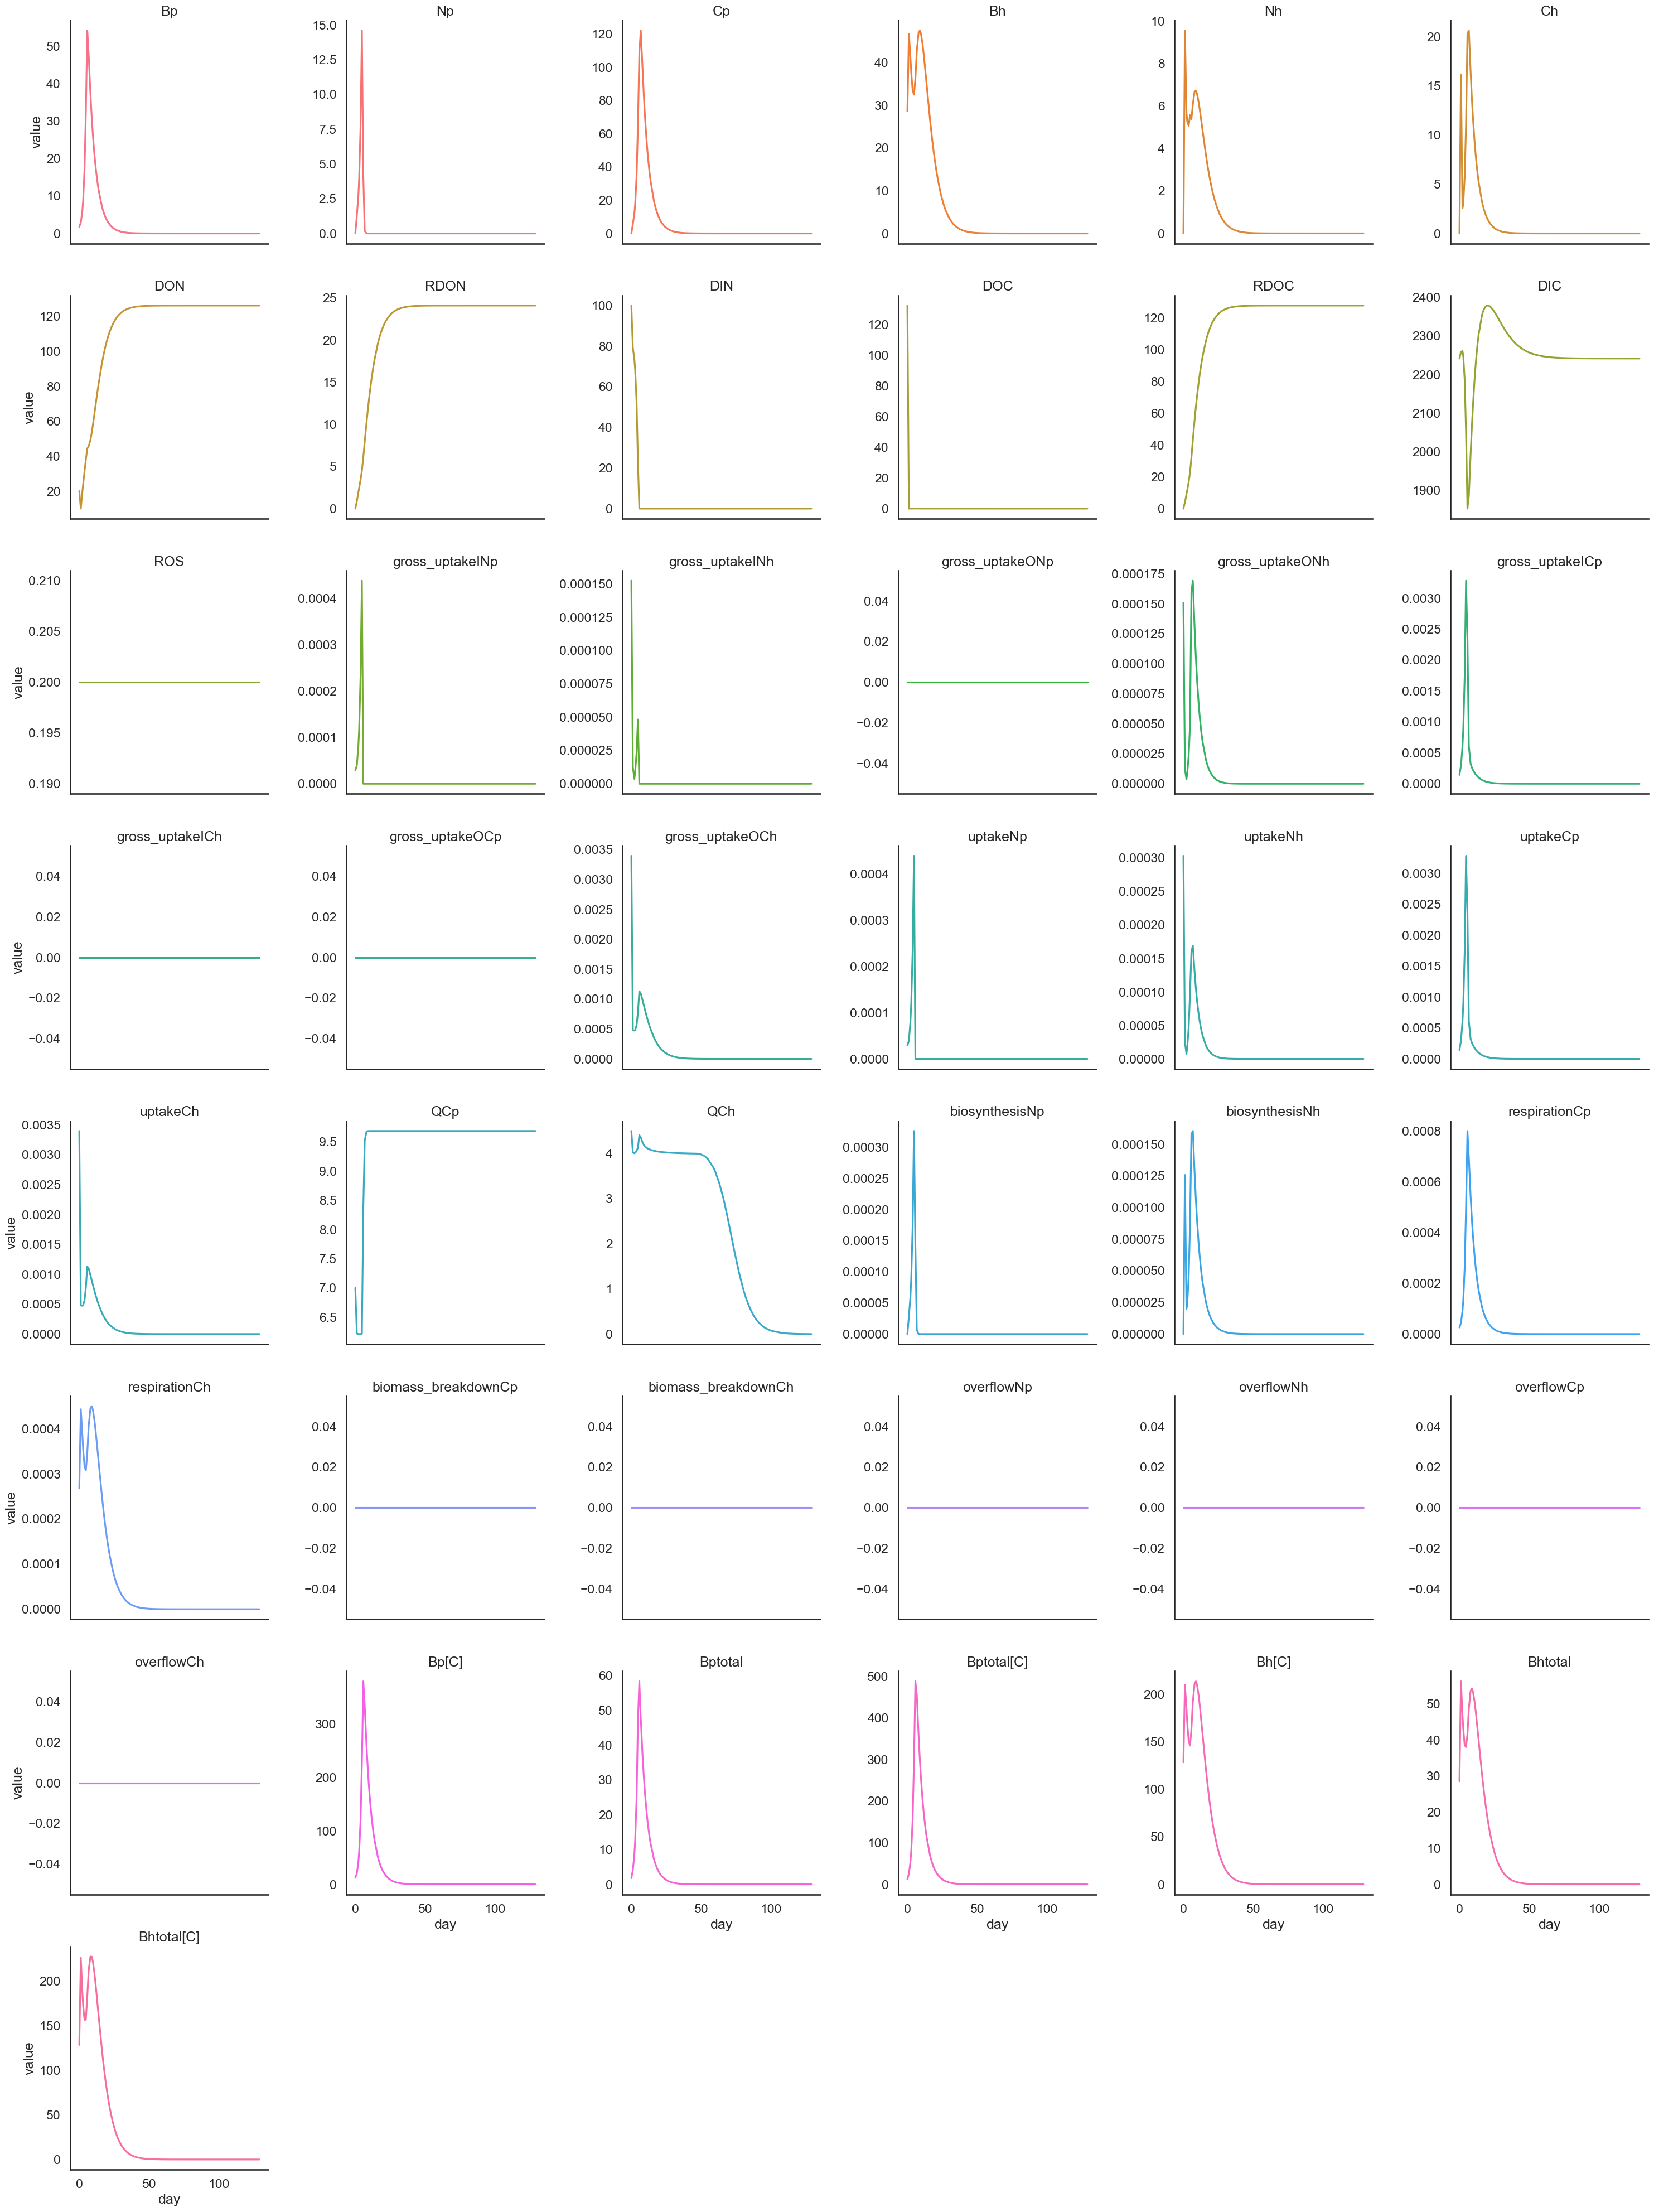

In [82]:
sns.set_context('talk')
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [83]:
mdf2 = df2.melt(id_vars=['t', 'day'])

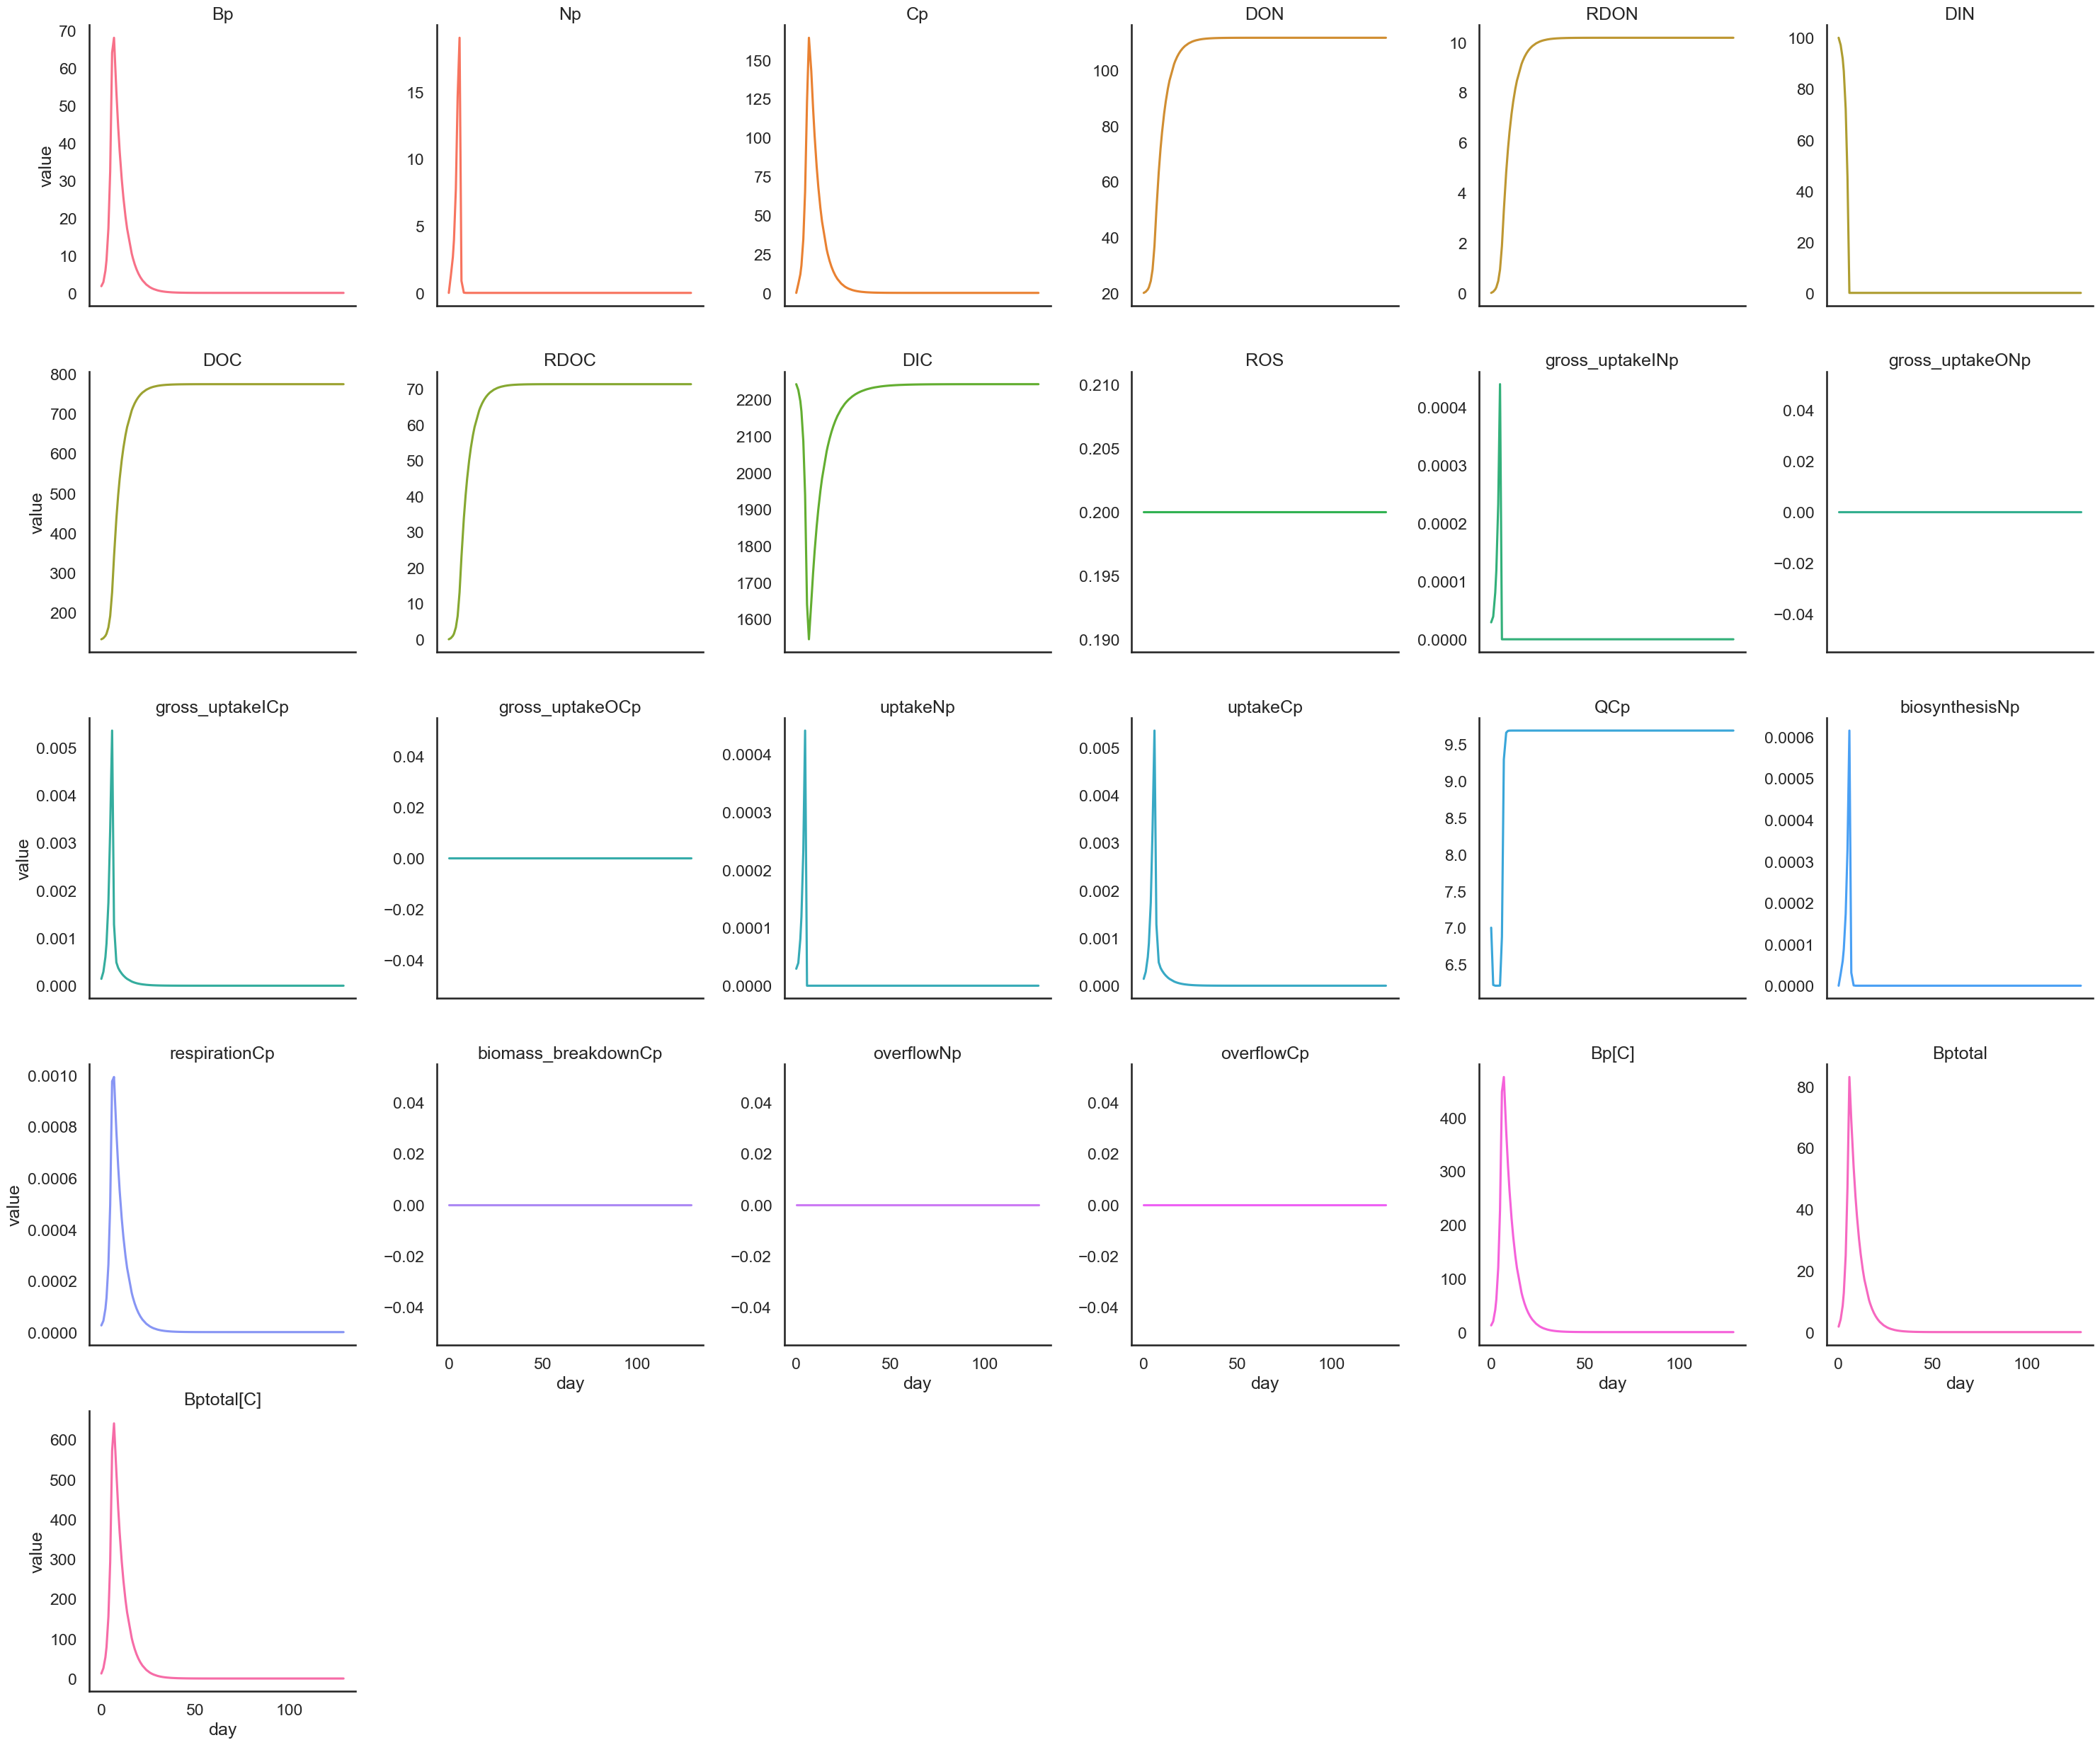

In [84]:
sns.set_context('talk')
sns.relplot(data=mdf2, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [30]:
jac_sparsity = prepare_jac_sparsity_cc(ROS_mode=False)

In [31]:
sol = run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple, jac_sparsity=jac_sparsity)


In [32]:
%timeit -r 4 -n 2  run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple, jac_sparsity=jac_sparsity)


2.08 s ± 34.1 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [33]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 24427
     njev: 9
      nlu: 5038
      sol: None
   status: 0
  success: True
        t: array([       0,    14400,    28800,    43200,    57600,    72000,
          86400,   100800,   115200,   129600,   144000,   158400,
         172800,   187200,   201600,   216000,   230400,   244800,
         259200,   273600,   288000,   302400,   316800,   331200,
         345600,   360000,   374400,   388800,   403200,   417600,
         432000,   446400,   460800,   475200,   489600,   504000,
         518400,   532800,   547200,   561600,   576000,   590400,
         604800,   619200,   633600,   648000,   662400,   676800,
         691200,   705600,   720000,   734400,   748800,   763200,
         777600,   792000,   806400,   820800,   835200,   849600,
         864000,   878400,   892800,   907200,   921600,   936000,
         950400,   964800,   979200,   993600,  1008000,  1022400,
        1036

In [193]:
df = solver2df_ivp(sol, var_names, par_tuple)


In [194]:
mdf = df.melt(id_vars=['t', 'day'])

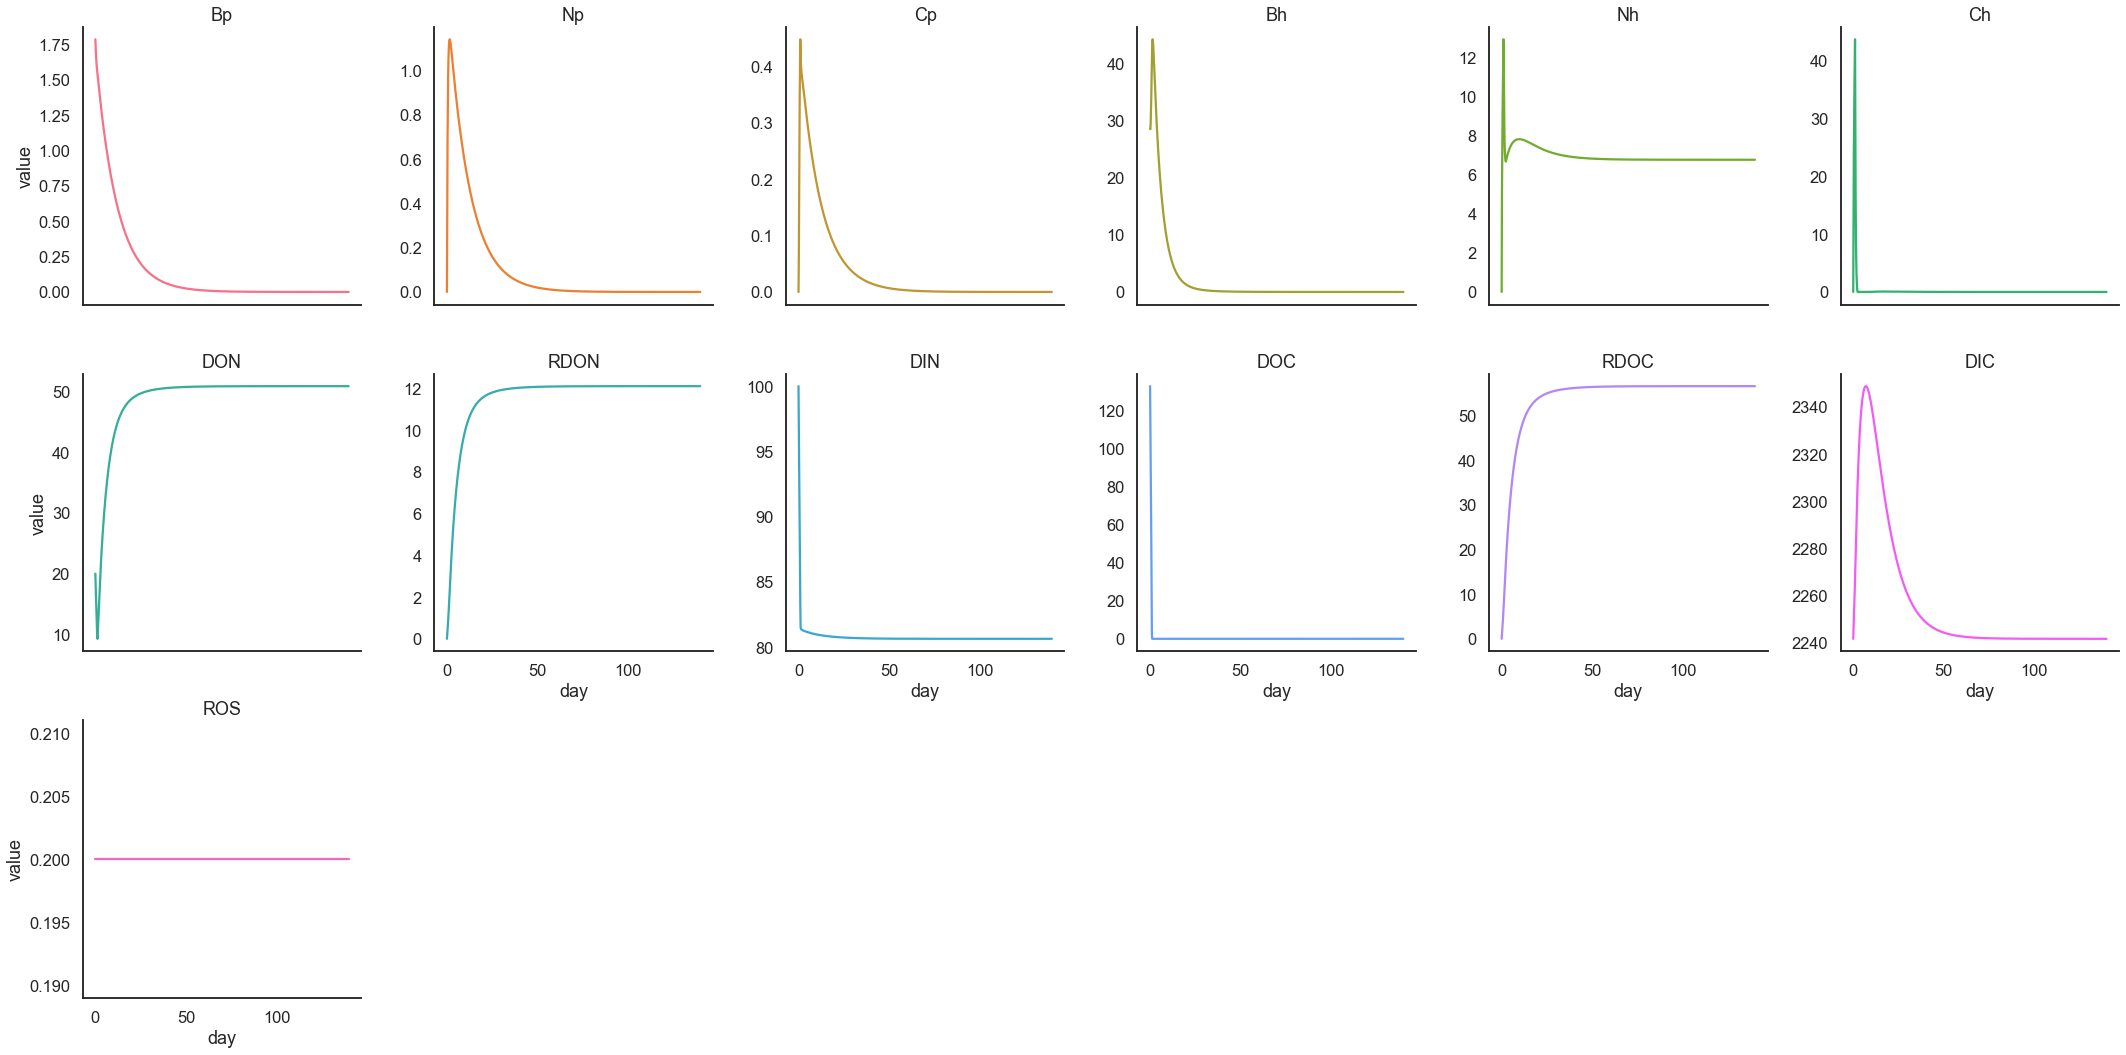

In [195]:
sns.set_context('talk')
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [49]:

def run_with_params_json(json_fpath_list, days, refdf, out_dpath, out_fprefix, which_organism, pro99_mode, t_eval):
    perr = -1
    orig_t_eval = t_eval
    new_params = param_vals
    for json_fpath in json_fpath_list:
        new_params = json2params(new_params, json_fpath)
    if which_organism == 'ponly':
        var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data(param_vals_str=new_params, pro99_mode=pro99_mode)
    elif which_organism == 'honly':
        var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_honly_data(param_vals_str=new_params, pro99_mode=pro99_mode)
    else:
        var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data(param_vals_str=new_params, pro99_mode=pro99_mode)
    if t_eval is None:
        if refdf is not None:
            orig_t_eval = np.rint(refdf['t'].drop_duplicates().sort_values()).values
            t_eval = get_t_eval(days, ref_times = orig_t_eval)
        else:
            t_eval = get_t_eval(days)
    else:
        t_eval = get_t_eval(days, ref_times = t_eval)

    
    sol = run_solver(calc_dydt, init_vars, t_eval=t_eval, days=days)
    sumdf = pd.DataFrame({str(k): v for k,v in new_params.items()}, index=[0])
    sumdf['run_id'] = out_fprefix
    #sumdf['status'] = sol.status
    #if sol.status != 0:
    #    sumdf['message'] = sol.message
    #if sol.success:
    df = solver2df(sol, var_names, None, intermediate_func, new_params, t_eval=orig_t_eval)
    df.to_csv(os.path.join(out_dpath, f'{out_fprefix}_df.csv.gz'), compression='gzip')

    if refdf is not None:
        try:
            mse_df = compute_mse(df, refdf, refcol= 'ref_Bp', col='Bp', timecol='t', tolerance=100)
            mse_df.to_csv(os.path.join(out_dpath, f'{out_fprefix}_mse.csv.gz'), compression='gzip')
            perr = mse_df['MSE'].min()

        except Exception as inst:
            print(inst)
            pass
    sumdf.to_csv(os.path.join(out_dpath, f'{out_fprefix}_sum.csv.gz'), compression='gzip')
    return perr 

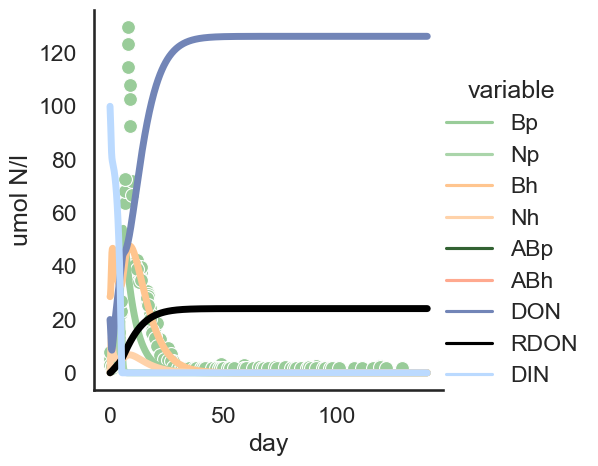

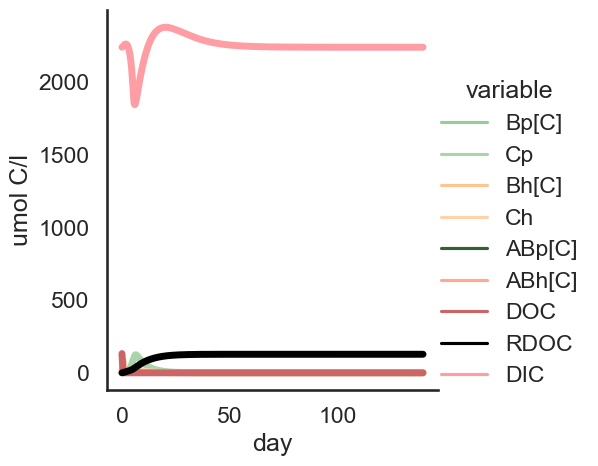

In [44]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol N/l', )
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol C/l', )
#sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

# g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
#             x='day', y='value', hue='variable',
#             kind='line', 
#             lw=5, legend=False,
#             palette=ccxpalette, hue_order=ccxorder,
#            ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)
plt.show()

In [156]:
df.Bh.value_counts()

28.571429    1
10.234618    1
10.117875    1
10.060045    1
10.002572    1
            ..
29.633122    1
29.703549    1
29.789616    1
29.898123    1
1.829349     1
Name: Bh, Length: 912, dtype: int64

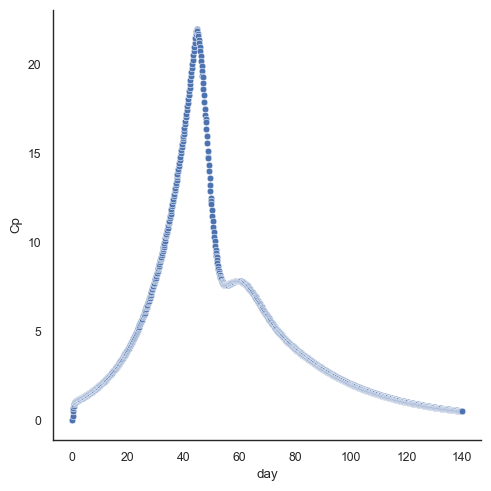

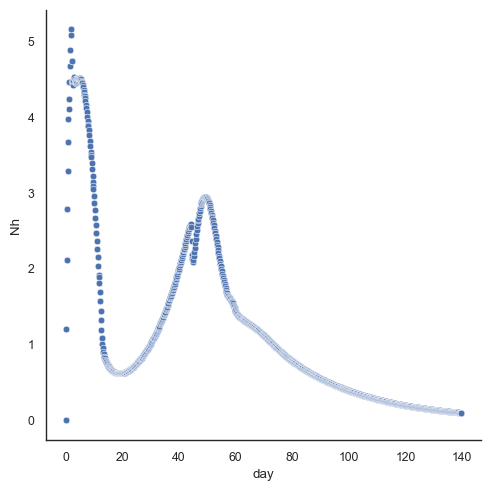

In [157]:
sns.set_context('paper')
sns.relplot(data=df, x='day', y='Cp')
sns.relplot(data=df, x='day', y='Nh')
#plt.ylim((0,0.0002))
#plt.yscale('log')
plt.show()

In [158]:
df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 'ABp', 'ABh', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh', 'death_ratep',
       'death_rateh', 'deathp', 'deathh', 'leakinessOp', 'leakinessIp',
       'leakinessOh', 'leakinessIh', 'ROSreleasep', 'ROSreleaseh',
       'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]', 'B

In [159]:
df.clip(lower=0)

,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,DOC,...,leakinessIh,ROSreleasep,ROSreleaseh,ROSbreakdownh,DON2DINp,DON2DINh,Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,0.000000,0.000000,28.571429,0.000000,0.000000,20.000000,0.000000,100.000000,132.500000,...,0.0,0.0,0.0,0.0,0.000004,0.000066,12.500000,128.571429,0.0,0.0
1,1.734858,0.650016,0.240120,27.949693,1.211440,9.627725,19.062085,0.199777,99.549273,121.329723,...,0.0,0.0,0.0,0.0,0.000004,0.000062,12.144006,125.773617,0.0,0.0
2,1.704601,0.981799,0.501170,27.872156,2.121107,16.395596,18.059795,0.397048,99.220636,110.594181,...,0.0,0.0,0.0,0.0,0.000004,0.000058,11.932204,125.424704,0.0,0.0
3,1.691595,1.159270,0.697294,28.184777,2.788881,21.233768,17.031949,0.595036,98.905635,99.989676,...,0.0,0.0,0.0,0.0,0.000003,0.000056,11.841165,126.831497,0.0,0.0
4,1.690644,1.259630,0.832465,28.772716,3.285058,24.804907,15.996170,0.796036,98.556890,89.323361,...,0.0,0.0,0.0,0.0,0.000003,0.000053,11.834507,129.477220,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1.390216,0.433961,0.533036,1.871726,0.102526,0.599385,7.017639,139.529395,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.731513,8.422765,0.0,0.0
908,1.382280,0.431484,0.529993,1.861040,0.101941,0.595963,7.017639,139.551079,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.675958,8.374681,0.0,0.0
909,1.374389,0.429021,0.526967,1.850416,0.101359,0.592561,7.017639,139.572640,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.620720,8.326872,0.0,0.0
910,1.366543,0.426571,0.523959,1.839852,0.100780,0.589178,7.017639,139.594077,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000001,9.565798,8.279336,0.0,0.0


In [174]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df.clip(lower=0)[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


KeyError: "['ABp', 'ABh'] not in index"